<a href="https://colab.research.google.com/github/Ushasri11/Final-Project-/blob/main/MajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("rainfall_in_india_1901-2015.csv")


In [ ]:
data.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

In [ ]:
data = data.fillna(data.mean())

In [ ]:
data.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
SUBDIVISION    4116 non-null object
YEAR           4116 non-null int64
JAN            4116 non-null float64
FEB            4116 non-null float64
MAR            4116 non-null float64
APR            4116 non-null float64
MAY            4116 non-null float64
JUN            4116 non-null float64
JUL            4116 non-null float64
AUG            4116 non-null float64
SEP            4116 non-null float64
OCT            4116 non-null float64
NOV            4116 non-null float64
DEC            4116 non-null float64
ANNUAL         4116 non-null float64
Jan-Feb        4116 non-null float64
Mar-May        4116 non-null float64
Jun-Sep        4116 non-null float64
Oct-Dec        4116 non-null float64
dtypes: float64(17), int64(1), object(1)
memory usage: 611.0+ KB


In [ ]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [ ]:

data.tail()


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
4115,LAKSHADWEEP,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4


In [ ]:
df=pd.DataFrame(data)
print(df.sort_values(by=['YEAR'],ascending=False))

                             SUBDIVISION  YEAR    JAN    FEB    MAR    APR  \
4115                         LAKSHADWEEP  2015    2.2    0.5    3.7   87.1   
3886            SOUTH INTERIOR KARNATAKA  2015    1.7    0.2   24.4   80.5   
1586                              PUNJAB  2015   17.7   31.3   68.5   29.8   
206                    ARUNACHAL PRADESH  2015   30.8   47.5   97.5  287.1   
551   SUB HIMALAYAN WEST BENGAL & SIKKIM  2015   15.7   15.0   64.8  149.0   
321                    ASSAM & MEGHALAYA  2015   13.4   15.5   37.5  250.9   
2621                        KONKAN & GOA  2015    2.7    0.0   36.8    3.6   
2506                  SAURASHTRA & KUTCH  2015    0.9    0.0    4.4    2.1   
1126                  EAST UTTAR PRADESH  2015   30.0    4.1   48.2   23.2   
436               NAGA MANI MIZO TRIPURA  2015   14.4   14.2   21.6  253.5   
666                 GANGETIC WEST BENGAL  2015   12.9    5.5   19.3   88.7   
1356                         UTTARAKHAND  2015   54.5   62.6  12

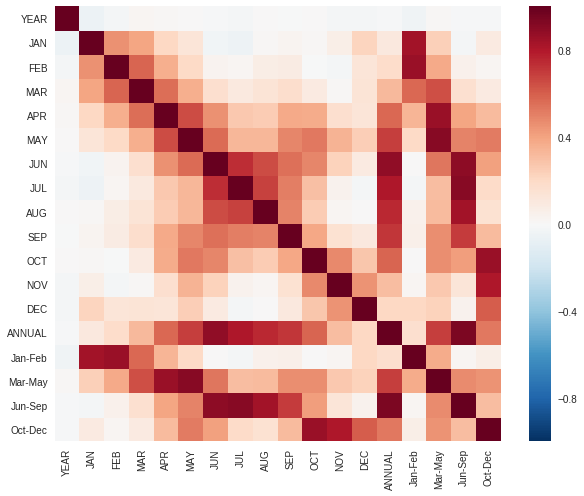

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr())

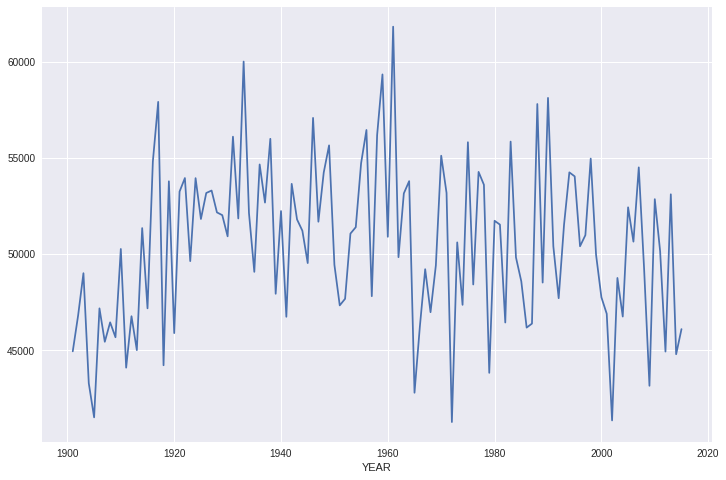

In [ ]:
data.groupby("YEAR").sum()['ANNUAL'].plot(figsize=(12,8));

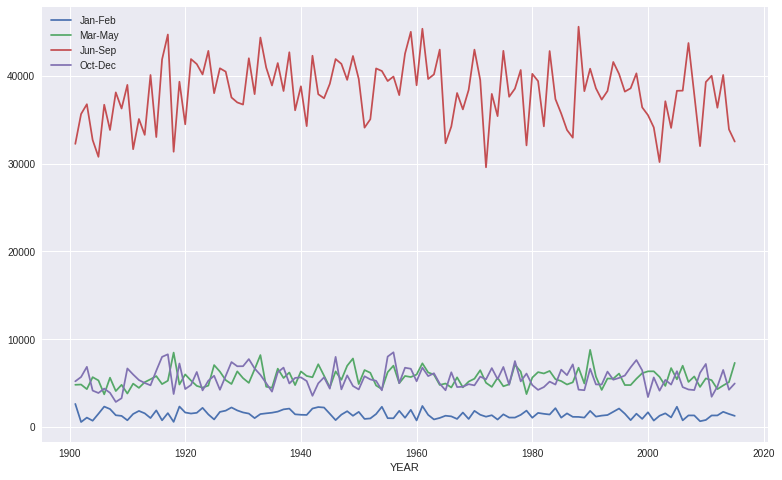

In [ ]:
data[['YEAR','Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("YEAR").sum().plot(figsize=(13,8));

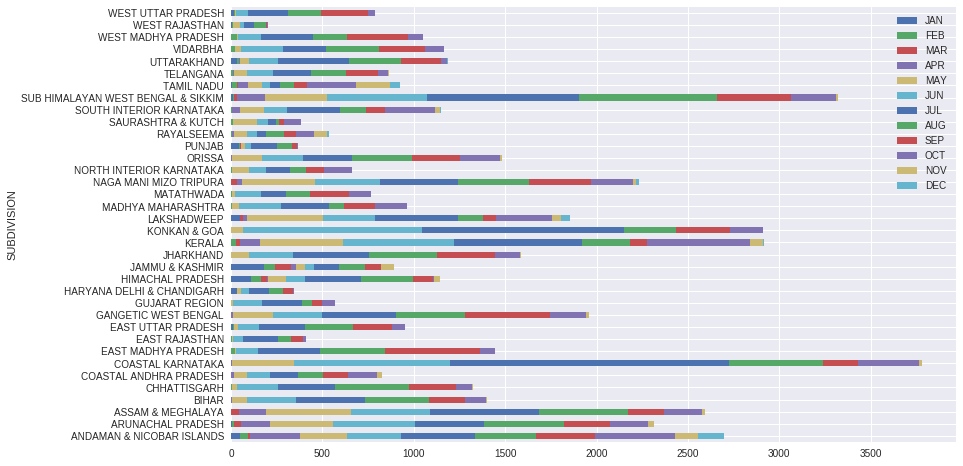

In [ ]:
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 1999]
temp.groupby('SUBDIVISION').sum().plot.barh(stacked=True,figsize=(13,8));

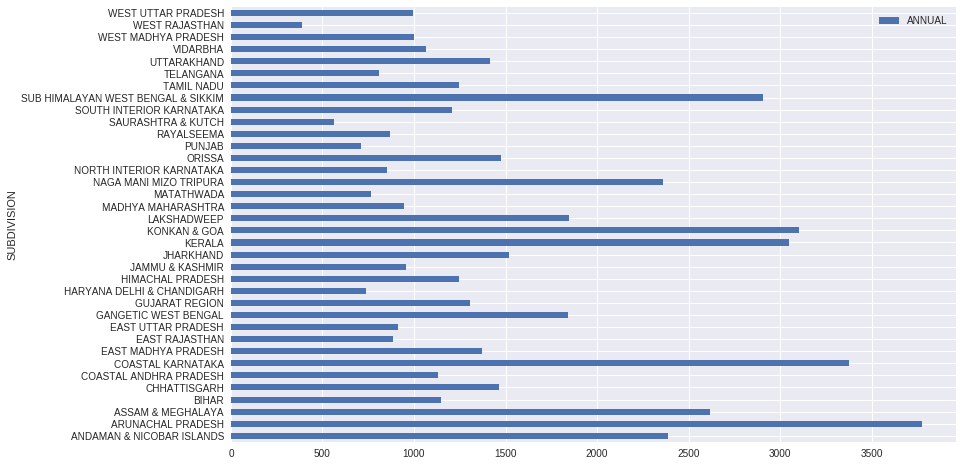

In [ ]:
temp = data[['SUBDIVISION','ANNUAL']].loc[data['YEAR'] == 1977]
temp.groupby('SUBDIVISION').mean().plot.barh(stacked=True,figsize=(13,8));

In [ ]:
X=data.drop(['ANNUAL','SUBDIVISION','YEAR'],axis=1)
y=data['ANNUAL']


In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import math
x=data[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']]
y=data['ANNUAL']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.7,random_state=10)
lr=LinearRegression()
lr.fit(x_train.values,y_train.values)
pred=lr.predict(x_test)
print("Root Mean Squared Error =",np.sqrt(mean_squared_error(y_test,pred)))
print("Training Score:",lr.score(x_train, y_train))
print("Testing Score:",lr.score(x_test,y_test))


Root Mean Squared Error = 511.25856882574465
Training Score: 0.9996195458627357
Testing Score: 0.6747959057846369


___Multiple Linear regression model between annual rainfall and the periodic rainfall___
Root Mean Squared Error = 57.675087806971476
Training Score: 0.9886281416024831
Testing Score: 0.9958637383726687


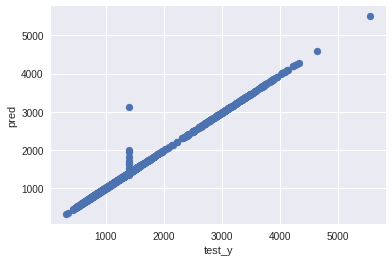

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import math
print("___Multiple Linear regression model between annual rainfall and the periodic rainfall___")
y=data['ANNUAL']
x=data[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']]
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,shuffle=False)
lm=linear_model.LinearRegression()
lm.fit(train_x,train_y)
pred=lm.predict(test_x)
print("Root Mean Squared Error =",np.sqrt(mean_squared_error(test_y,pred)))
print("Training Score:",lm.score(train_x, train_y))
print("Testing Score:",lm.score(test_x,test_y))
plt.scatter(test_y,pred)
plt.xlabel('test_y')
plt.ylabel('pred')
plt.show()

In [ ]:
pred

array([ 984.18433613, 1400.46553121, 1128.30089652, ..., 1420.505693  ,
       1389.29188745, 1639.90548465])

In [ ]:
test_x=[[140,0,30,400]]
clf_predict=lm.predict(test_x)
clf_predict

array([571.7542742])

In [ ]:
test_x=[[100,20,300,40]]
clf_predict=lm.predict(test_x)
clf_predict

array([463.2693457])

In [ ]:
test_y


2881     983.1
2882    1404.2
2883    1130.5
2884    1502.3
2885    1218.3
2886    1158.0
2887    1451.2
2888    1319.1
2889    1460.9
2890     881.9
2891    1357.5
2892     828.9
2893    1341.7
2894    1018.2
2895    1367.8
2896    1199.4
2897    1173.0
2898    1168.3
2899    1182.8
2900    1398.3
2901     793.5
2902    1082.3
2903     807.7
2904    1137.8
2905    1100.4
2906    1368.7
2907    1124.6
2908    1070.9
2909    1172.2
2910    1606.3
         ...  
4086    1465.9
4087    1288.6
4088    1450.8
4089    1714.4
4090    1310.5
4091    1583.0
4092    1534.9
4093    1449.7
4094    1547.1
4095    2030.9
4096    1606.0
4097    1764.7
4098    1986.9
4099    1857.3
4100    1372.1
4101    1380.6
4102    1033.5
4103    1532.9
4104    1553.2
4105    1575.4
4106    1598.6
4107    2361.6
4108    1726.8
4109    1570.1
4110    1725.2
4111    1533.7
4112    1405.5
4113    1426.3
4114    1395.0
4115    1642.9
Name: ANNUAL, Length: 1235, dtype: float64

In [ ]:
pred

array([ 984.18433613, 1400.46553121, 1128.30089652, ..., 1420.505693  ,
       1389.29188745, 1639.90548465])